### Simulate radial diffusion using finite-volume method in single particle
This notebook simulates radial symmetric diffusion in a single negative-electrode particle. It is part of how a single-particle battery model might be constructed (you would also need to simulate the positive electrode, and combine results).

In [4]:
R = 10e-6;             % particle radius [m]
Cmax = 12000;          % [mol/m^3]
c0 = 9500;             % initial concentration [mol/m^3]
j0 = 5000*R/3/1800;    % lithium flux [mol/m^2/sec]
D = 1e-14;             % solid diffusivity, [m^2/s]
 
jk = [j0*ones(1,1800), zeros(1,3600)]; % discharge and rest
jk = [jk -jk];         % discharge and rest, then charge and rest
 
% Simulation control
Nr = 20;               % number of "shells" radially
dR = R/Nr;             % width of each "shell"
Sa = 4*pi*(R*(1:Nr)/Nr).^2; % outer surface area of each shell
dV = (4/3)*pi*((R*(1:Nr)/Nr).^3-(R*(0:Nr-1)/Nr).^3); % vol. of ea. shell
dt = 1;                % time steps of 1 second

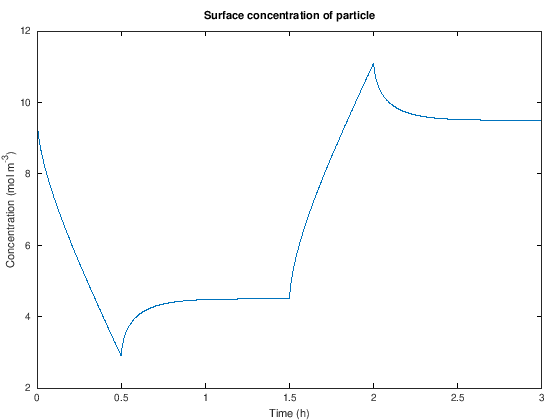

In [5]:
c = c0*ones(1,Nr);     % initialize concentration profile versus "r" dimension
cse = zeros(size(jk)); % concentration at surface
cse(1) = c0;

for timestep = 1:length(jk),
  N = -D*diff(c)/dR;   % flux at surfaces between "bins"
  M = N.*Sa(1:end-1);  % total moles crossing surfaces
  c = c + ([0 M] - [M 0])*dt./dV; % conc. change via diffusion
  c(end) = c(end) - jk(timestep)*Sa(end)*dt/dV(end); % at boundary
  cse(timestep+1) = c(end);
end

plot((0:length(jk))/3600,cse/1000); 
title('Surface concentration of particle')
xlabel('Time (h)'); ylabel('Concentration (mol m^{-3})')